In [1]:
#pip install -r requirements.txt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('sales_data1.csv', encoding='latin1')

df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
df[['MONTH', 'DAY', 'YEAR']] = df['ORDERDATE'].str.split('/', expand=True)
df['TIME'] = df['YEAR'].str.split(' ', expand=True)[1]
df['YEAR'] = df['YEAR'].str.split(' ', expand=True)[0]
df = df.drop(['ORDERDATE', 'TIME'], axis=1)
df = df[df['SALES'] <= 6500]
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,MONTH,DAY,YEAR
0,10107,30,95.70,2,2871.00,Shipped,1,2,2003,Motorcycles,...,NY,10022,USA,NaN,Yu,Kwai,Small,2,24,2003
1,10121,34,81.35,5,2765.90,Shipped,2,5,2003,Motorcycles,...,NaN,51100,France,EMEA,Henriot,Paul,Small,5,7,2003
2,10134,41,94.74,2,3884.34,Shipped,3,7,2003,Motorcycles,...,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,7,1,2003
3,10145,45,83.26,6,3746.70,Shipped,3,8,2003,Motorcycles,...,CA,90003,USA,NaN,Young,Julie,Medium,8,25,2003
4,10159,49,100.00,14,5205.27,Shipped,4,10,2003,Motorcycles,...,CA,NaN,USA,NaN,Brown,Julie,Medium,10,10,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,Shipped,4,12,2004,Ships,...,NaN,28034,Spain,EMEA,Freyre,Diego,Small,12,2,2004
2819,10373,29,100.00,1,3978.51,Shipped,1,1,2005,Ships,...,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium,1,31,2005
2820,10386,43,100.00,4,5417.57,Resolved,1,3,2005,Ships,...,NaN,28034,Spain,EMEA,Freyre,Diego,Medium,3,1,2005
2821,10397,34,62.24,1,2116.16,Shipped,1,3,2005,Ships,...,NaN,31000,France,EMEA,Roulet,Annette,Small,3,28,2005


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

df_model = df.copy()

# Identify categorical columns // copilot generated, per evitar un error de string a float
categorical_cols = df_model.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le

#separar, excloure, definir variables
X, y = df_model.drop('SALES', axis=1), df_model['SALES']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Entrenar model
# use a valid number of trees; enable parallel jobs for speed
model = RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

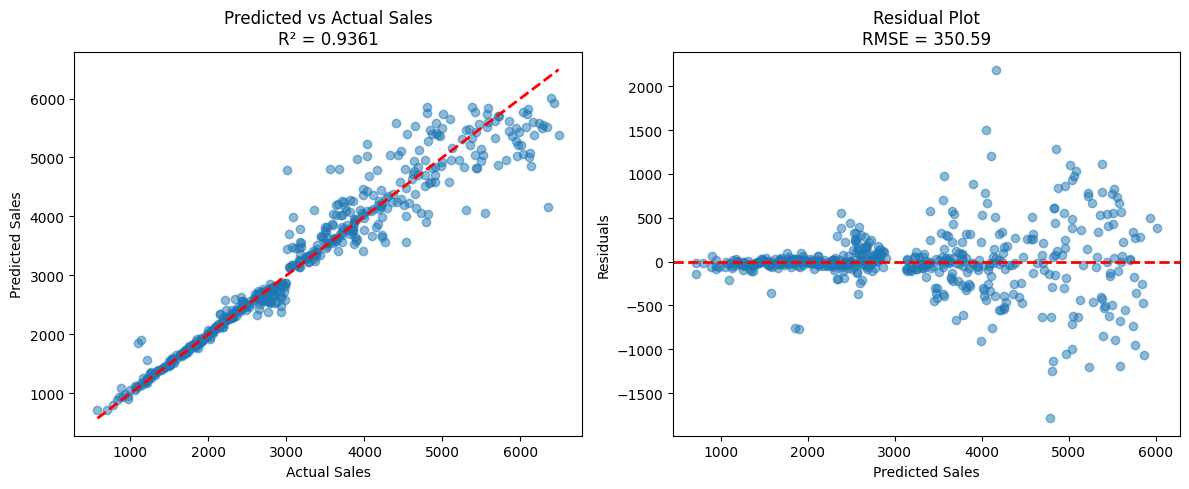

R² Score: 0.9361
RMSE: 350.59


In [5]:
#verure performance model, copilot generated
# Calculate metrics
r2_score = model.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Create visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Predicted vs Actual
ax1.scatter(y_test, y_pred, alpha=0.5)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax1.set_xlabel('Actual Sales')
ax1.set_ylabel('Predicted Sales')
ax1.set_title(f'Predicted vs Actual Sales\nR² = {r2_score:.4f}')

# Plot 2: Residuals
residuals = y_test - y_pred
ax2.scatter(y_pred, residuals, alpha=0.5)
ax2.axhline(y=0, color='r', linestyle='--', lw=2)
ax2.set_xlabel('Predicted Sales')
ax2.set_ylabel('Residuals')
ax2.set_title(f'Residual Plot\nRMSE = {rmse:.2f}')

plt.tight_layout()
plt.show()

print(f'R² Score: {r2_score:.4f}')
print(f'RMSE: {rmse:.2f}')

In [6]:
# ============================================
# GUARDAR MODEL I PREPROCESSADORS PER LA WEB
# ============================================
import joblib
import os
from sklearn.metrics import mean_absolute_error, r2_score

# Crear carpeta models/ si no existeix
os.makedirs('models', exist_ok=True)

# Calcular mètriques
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# 1. Guardar el model RandomForest
joblib.dump(model, 'models/sales_data1_model.pkl')
print("✅ Model guardat: models/sales_data1_model.pkl")

# 2. Guardar els label encoders
joblib.dump(label_encoders, 'models/sales_data1_label_encoders.pkl')
print("✅ Label Encoders guardats: models/sales_data1_label_encoders.pkl")

# 3. Crear estadístiques per producte (per prediccions)
# Primer, necessitem identificar les columnes rellevants
product_col = 'PRODUCTCODE' if 'PRODUCTCODE' in df.columns else df.columns[0]
product_stats = df.groupby(product_col).agg({
    'PRICEEACH': 'mean',
    'QUANTITYORDERED': 'mean',
    'SALES': 'mean'
}).reset_index()
product_stats.columns = ['Product', 'Price Each', 'Quantity Ordered', 'Avg_Sales']

# Afegir info de categoria si existeix
if 'PRODUCTLINE' in df.columns:
    product_line = df.groupby(product_col)['PRODUCTLINE'].first().reset_index()
    product_stats = product_stats.merge(product_line, left_on='Product', right_on=product_col)
    product_stats['catégorie'] = product_stats['PRODUCTLINE']
    product_stats = product_stats.drop([product_col, 'PRODUCTLINE'], axis=1)
else:
    product_stats['catégorie'] = 'General'

product_stats.to_csv('models/sales_data1_product_stats.csv', index=False)
print("✅ Estadístiques per producte guardades")

# 4. Guardar mappings i info del model
mappings = {
    'feature_columns': list(X.columns),
    'training_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
    'model_type': 'RandomForest',
    'model_metrics': {
        'mse': float(mse),
        'rmse': float(rmse),
        'mae': float(mae),
        'r2': float(r2)
    }
}
joblib.dump(mappings, 'models/sales_data1_mappings.pkl')
print("✅ Mappings guardats")

# 5. Guardar un "scaler" buit (el RandomForest no necessita scaling)
# però el creem per compatibilitat amb la web
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  # Fit per si de cas
joblib.dump(scaler, 'models/sales_data1_scaler.pkl')
print("✅ Scaler guardat (per compatibilitat)")

print("\n" + "=" * 60)
print("TOTS ELS COMPONENTS GUARDATS CORRECTAMENT!")
print("=" * 60)
print(f"\nMètriques del model:")
print(f"   R² Score: {r2:.4f}")
print(f"   MAE: {mae:.2f}")
print(f"   RMSE: {rmse:.2f}")

✅ Model guardat: models/sales_data1_model.pkl
✅ Label Encoders guardats: models/sales_data1_label_encoders.pkl
✅ Estadístiques per producte guardades
✅ Mappings guardats
✅ Scaler guardat (per compatibilitat)

TOTS ELS COMPONENTS GUARDATS CORRECTAMENT!

Mètriques del model:
   R² Score: 0.9361
   MAE: 198.94
   RMSE: 350.59
